# Introduction

Scheduling patients in a day hospital using a clinical pathway is crucial for optimizing the diagnosis and treatment process. A clinical pathway outlines the sequence of appointments and procedures that a patient must undergo. Efficient scheduling ensures that patients receive timely care, reducing waiting times and improving overall satisfaction.

In this analysis, we will examine the results stored in the `Results` folder, where a Linear Optimization Model has been used to schedule patients based on a set Quality of Service (QoS) criteria. The QoS is related to the relative waiting time of the patient. A QoS of 100% indicates that the patient never waits between appointments in their clinical pathway, while a QoS of 0% means there is no limitation on the waiting time between appointments within the planning horizon (one day).

The hypothesis we want to  consider is that the number of patients attended by the hospital is correlated to the set quality of services. To make such analysis we want to generate a heat map of the average number of attended patients within a scenario versus the QoS. This will allow to visualize, this correlation if it exists. 




# Data Description

The data used in this analysis is generated from a series of simulations aimed at optimizing patient scheduling in a day hospital. The results are stored in text files within the `Results` folder. Each file contains information about the number of patients, their target Quality of Service (QoS), and the actual QoS achieved after scheduling.

## Data Contents

- **Target_QoS**: The desired Quality of Service level set for the simulation.
- **P_Init**: The initial number of patients requiring appointments.
- **P_Final**: The number of patients who were successfully attended to.
- **QoS_Final**: The final Quality of Service level achieved after scheduling.

The data is read from the text files and stored in a DataFrame for further analysis. The DataFrame is then grouped by the initial number of patients and the target QoS to calculate the average values for each group. This allows us to analyze the relationship between the target QoS and the number of patients attended.
```

In [54]:
#We are going to read the results from the text files and store them in a DataFrame.
import os
import pandas as pd

# Define the path to the results folder
results_folder = 'Results'

# Initialize an empty list to store the data
data = []

# Loop through the files in the results folder
for file_name in os.listdir(results_folder):
    if file_name.endswith('.txt'):
        print(file_name)
        # Extract the number of patients from the file name
        target_qos = int(file_name.split('_')[2].split('.')[0])
        
        # Load the data from the text file
        with open(os.path.join(results_folder, file_name), 'r') as file:
            lines = file.readlines()
            headers = lines[0].split()
            i_targetqos= headers.index('Target_QoS')
            i_initial_patient = headers.index('#_Patient')
            i_attented_patient = headers.index('#P_Init')
            i_QoS_Final= headers.index('QoS_Final')
            i_Target_QoS = headers.index('Target_QoS')
           
            lines = lines[1:]
            for line in lines:
                # Assuming the text file has QoS and PatientsAttended separated by a space
                splitdata = line.split()
                try:
                    # Convert only numeric values to float
                    splitdata = [float(value) if value.replace('.', '', 1).isdigit() else value for value in splitdata]
                except ValueError as e:
                    print(f"Error converting line to float: {e}")
                
                data.append({'Target_QoS': splitdata[i_Target_QoS], 'Initial_Patient': splitdata[i_initial_patient], 'Attented_Patient': splitdata[i_attented_patient], 'QoS_Final': splitdata[i_QoS_Final]})

# Create a DataFrame from the data
results_df = pd.DataFrame(data)

results_df = results_df.groupby(['Initial_Patient', 'Target_QoS']).mean()

results_df.reset_index(inplace=True)

results_df['Perc_Attended'] = results_df['Attented_Patient'] / results_df['Initial_Patient']


# Display the DataFrame
print(results_df)

Result_Simulation_100.txt
Result_Simulation_0.txt
Result_Simulation_25.txt
Result_Simulation_50.txt
Result_Simulation_75.txt
    Initial_Patient  Target_QoS  Attented_Patient  QoS_Final  Perc_Attended
0              20.0         0.0              19.4   62.63095       0.970000
1              20.0        25.0              19.4   63.10625       0.970000
2              20.0        50.0              19.4   65.66300       0.970000
3              20.0        75.0              19.4   77.47100       0.970000
4              20.0       100.0              18.7   97.51190       0.935000
5              30.0         0.0              28.1   45.89805       0.936667
6              30.0        25.0              28.1   46.21115       0.936667
7              30.0        50.0              28.2   53.18370       0.940000
8              30.0        75.0              27.5   68.76675       0.916667
9              30.0       100.0              23.9   93.92645       0.796667
10             40.0         0.0        

Now that we have the dataframe with the results grouped by target QoS and the number of patients requiring an appointment, we will create a heat map to verify our hypothesis. The heat map will help us visualize the relationship between these variables and identify any patterns or correlations. By doing so, we can better understand how the target QoS and the number of patients impact each other and make more informed decisions based on this analysis.

   Initial_Patient  Target_QoS  Attented_Patient  QoS_Final  Perc_Attended
0             20.0         0.0              19.4   62.63095          0.970
1             20.0        25.0              19.4   63.10625          0.970
2             20.0        50.0              19.4   65.66300          0.970
3             20.0        75.0              19.4   77.47100          0.970
4             20.0       100.0              18.7   97.51190          0.935
0.97


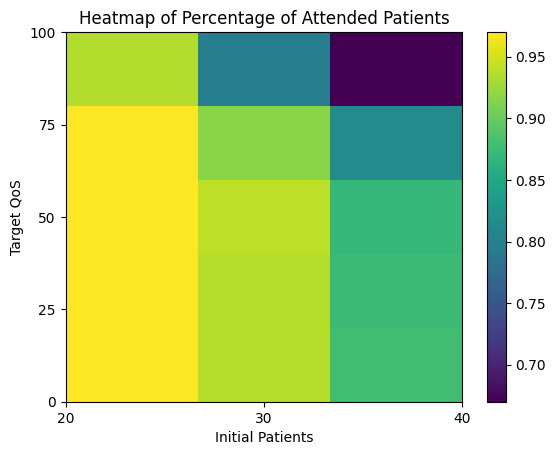

In [55]:
# We now use the DataFrame to plot the results with matplotlib
import matplotlib.pyplot as plt

# Plot the results
# results_df.unstack().plot(kind='line', y='QoS_Final')
# plt.title('QoS Final vs Initial Patients')
# plt.xlabel('Initial Patients')
# plt.ylabel('QoS Final')
# plt.show()

# Now we do the heat map of the attented patients vs the target QoS for the different initial patients

# Plot the results
print(results_df.head())
print(max(results_df['Perc_Attended']))
plt.hist2d(results_df['Initial_Patient'], results_df['Target_QoS'], bins=(3, 5), weights=results_df['Perc_Attended'])
plt.colorbar()
plt.title('Heatmap of Percentage of Attended Patients')
plt.xlabel('Initial Patients')
x_ticks = results_df['Initial_Patient'].unique()
x_tick_labels = ['', '20', '', '30', '', '40']
plt.xticks(results_df['Initial_Patient'].unique())
plt.ylabel('Target QoS')
plt.yticks(results_df['Target_QoS'].unique())
plt.show()





# Design Choices in Relation to Cairo's Principles

## Truthfulness
The heatmap accurately represents the data collected from the results of the Linear Optimization Model. Each cell in the heatmap corresponds to the percentage of attended patients for a given initial patient count and target QoS. The color intensity directly correlates with the percentage values, ensuring that the visual representation is truthful and not misleading.

## Beauty
The heatmap is designed with a clear and aesthetically pleasing color gradient that helps in distinguishing different levels of patient attendance. The choice of colors is such that it provides a smooth transition from low to high values, making the visual appealing and easy to interpret. The title and labels are appropriately sized and positioned to enhance readability without cluttering the visual.

## Functionality
The heatmap is functional in that it allows for quick identification of trends and patterns in the data. The axes are labeled with the initial patient count and target QoS, and the color bar provides a reference for the percentage of attended patients. This design ensures that the viewer can easily understand the relationship between the variables without needing additional explanations.

## Insightfulness
The heatmap provides insights into how the target QoS and initial patient count impact the percentage of attended patients. By visualizing the data in this manner, it becomes evident that higher QoS levels tend to result in lower attendance rates, and that there is an optimal range of QoS levels where attendance is maximized. This insight can help hospital administrators make informed decisions about patient scheduling and service quality optimization.
```


# Conclusion

The heatmap generated from the data provides a visual representation of the correlation between the percentage of attended patients and the set Quality of Service (QoS). From the heatmap, we can observe the following trends:

1. **Higher QoS Leads to Lower Attendance**: As the target QoS increases, the percentage of attended patients tends to decrease. This is evident from the lower values in the heatmap for higher QoS levels, indicating that stricter QoS criteria may result in fewer patients being attended.

2. **Initial Patient Count Impact**: The initial number of patients also plays a significant role in the percentage of attended patients. For lower initial patient counts, the percentage of attended patients is generally higher, while for higher initial patient counts, the percentage tends to be lower.

3. **Optimal QoS Levels**: There appears to be an optimal range of QoS levels where the percentage of attended patients is maximized. This range can be identified by the higher values in the heatmap, suggesting that there is a balance between providing high-quality service and attending to a larger number of patients.

Overall, the heatmap helps to visualize the trade-offs between the set QoS and the number of patients attended. By analyzing these patterns, hospital administrators can make more informed decisions to optimize patient scheduling and improve overall service quality.
```